In [1]:
import model_analysis as fn

import model_functions as fn1
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from sklearn.preprocessing import normalize
import math
from scipy.stats import norm
import random

In [2]:
stimulus_duration = 1000
sigma_i = 0.25
sigma_s = 0.25
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
stimulus_duration = 1000
frames_duration = dt
alfa = 1

In [3]:
L = 1
mu = 0.2
forward_matrix = np.zeros((int(1000*(L+L)),int(1000*(L+L))))
y = 0
for x in np.arange(-L,L,0.001): 
    # The mean of the distribution will be computed
    mean = x-(dt/tau)*(-mu-alfa*x*2+4*x**3)
    # The standard deviation of the distribution will be computed
    stdr_dev = np.sqrt(dt/tau)*np.sqrt(sigma_i**2+sigma_s**2)

    limits = np.linspace(-L,L,2000)
    cumulative = norm.cdf(limits, loc = mean, scale = stdr_dev)
    #plt.plot(np.arange(0,len(cumulative),1),cumulative)
    d = np.diff(cumulative)
    #plt.plot(np.arange(0,len(d),1),d)
    counter = 0
    for element in d:
        forward_matrix[counter][y]= element
        counter += 1
    if y <10:
        infinity = 1-sum(d)
        forward_matrix[0][y]+=infinity
    if y >= 10:
        infinity = 1-sum(d)
        forward_matrix[1999][y]+= infinity
    y += 1 


[1. 1. 1. ... 1. 1. 1.]


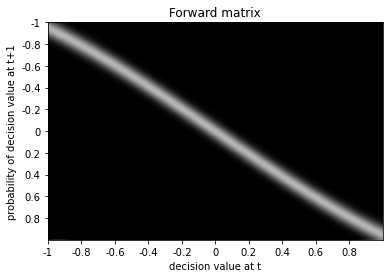

In [4]:
plt.figure()
im = Image.fromarray(forward_matrix*25600)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,200,400,600,800,1000,1200,1400,1600,1800,2000]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels, )
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")
print(np.sum(forward_matrix, axis=0))

In [5]:
vector = np.zeros((1,2000))[0]
vector[1000] = 1

# In this list the different vectors will be stored
final = [vector]
# Each vector will be multiplied by the forward matrix
for i in range(300):
    vector = forward_matrix.dot(vector)
    final.append(vector)
final = np.asarray(final)
final = final.transpose()


([<matplotlib.axis.XTick at 0x7fd1ee393820>,
 [Text(0.0, 0, '0.0'),
  Text(25.0, 0, '125.0'),
  Text(50.0, 0, '250.0'),
  Text(75.0, 0, '375.0'),
  Text(100.0, 0, '500.0'),
  Text(125.0, 0, '625.0'),
  Text(150.0, 0, '750.0'),
  Text(175.0, 0, '875.0'),
  Text(200.0, 0, '1000.0')])

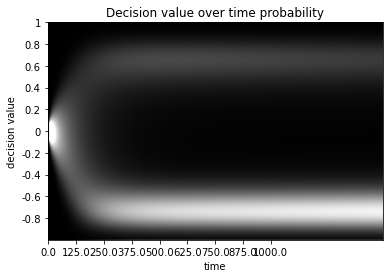

In [6]:
#DW(x_value, dt, tau, mu, sigma_i,  sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
trials, stimulus_list =  fn1.DW_data(0, dt, tau, mu, sigma_i, sigma_s, alfa, 10, 10, 0.5)
im = Image.fromarray(final*100000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
for trial in trials:
    trial.pop()
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*(1000))
    plt.plot(np.arange(0,len(trial_new),1),trial_new)
positions = [0,200,400,600,800,1000,1200,1400,1600,1800]
labels = [1,0.8,0.6,0.4,0.2,0,-0.2,-0.4,-0.6,-0.8]
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time")
plt.ylabel("decision value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)

In [31]:
stimulus_mu = []
for i in range(19):
    stimulus_mu.append(random.randrange(-8, 8, 1)/10)
    #stimulus_mu.append(0.2)
print(stimulus_mu)


[0.1, -0.5, 0.3, 0.6, 0.0, 0.5, -0.7, -0.7, 0.2, 0.1, -0.4, 0.0, 0.4, -0.4, -0.3, -0.4, 0.2, 0.0, 0.1]


In [32]:

trial_list = []
for i in range(10):
    trial = []
    x = 0
    for mu in stimulus_mu:
        trials, stimulus = fn1.DW_data(x, dt, tau, mu, sigma_i, sigma_s, alfa, 1, 10, 1)
        for a in trials[0]:
            trial.append(a)
        #trial = trials[0]
        x = trials[0][len(trials[0])-1]
    trial_list.append(trial)

([<matplotlib.axis.XTick at 0x7fd1ea010dc0>,
 [Text(0.0, 0, '0'),
  Text(55.0, 0, '250'),
  Text(110.0, 0, '500'),
  Text(165.0, 0, '750'),
  Text(220.0, 0, '1000')])

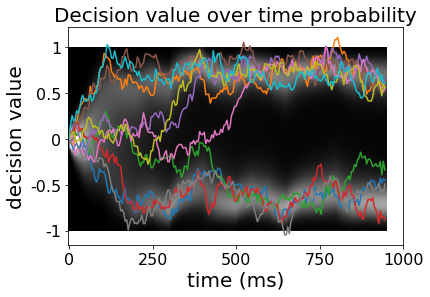

In [33]:


vector = np.zeros((1,2000))[0]
vector[1000] = 1
final = [vector]
for mu in stimulus_mu:
    forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
    for i in range(len(trials[0])):
        vector = forward_matrix.dot(vector)
        final.append(vector)
final = np.asarray(final)
final = final.transpose()
im = Image.fromarray(final*100000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
for trial in trial_list:
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*(1000))
    plt.plot(np.arange(0,len(trial_new),1),trial_new)
positions = [0,500,1000,1500,1999]
labels = [1,0.5,0,-0.5,-1]
plt.yticks(positions, labels, fontsize = 16)
plt.title("Decision value over time probability", fontsize = 20)
plt.xlabel("time (ms)", fontsize = 20)
plt.ylabel("decision value", fontsize = 20)
positions = [275/5*n for n in range(5)]
labels = [0,250,500,750,1000]
plt.xticks(positions, labels, fontsize = 16)


In [34]:
stimulus_mu = []
for i in range(20):
    stimulus_mu.append(random.randrange(-5, 5, 1)/10)
    #stimulus_mu.append(0.2)
print(stimulus_mu)

trial_list = []
for i in range(10000):
    trial = []
    x = 0
    for mu in stimulus_mu:
        trials, stimulus = fn1.DW_data(x, dt, tau, mu, sigma_i, sigma_s, alfa, 1, 10, 1)
        for a in trials[0]:
            trial.append(a)
        #trial = trials[0]
        x = trials[0][len(trials[0])-1]
    trial_list.append(trial)
print(len(trial_list))


[0.3, -0.5, 0.1, 0.0, -0.2, 0.0, -0.3, -0.3, 0.3, 0.0, 0.2, 0.4, 0.0, -0.2, 0.0, 0.2, 0.1, 0.0, -0.2, -0.3]
10000


In [35]:
print(len(trial_list[0]))

220


10000


Text(0, 0.5, 'frequency of the \n decision variable')

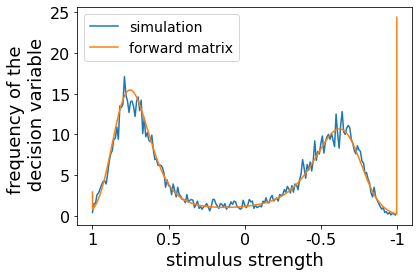

In [40]:
x_list = [(trial[80]+L)*1000 for trial in trial_list]
x_list = np.sort(x_list)
hist, base = np.histogram(x_list,bins = 200,range=(0,2000))
print(len(x_list))
base = [base[i] for i in range(len(base)-1)]
plt.plot(base,hist/10,label="simulation")
#plt.plot(np.arange(0,len(x_list),1),x_list,label="simulation")
# mean = np.mean(x_list)
# stdr_dev = np.std(x_list)
# print(mean,stdr_dev)
# limits = np.linspace(-L,L,2000)
# cumulative = norm.pdf(limits, loc = mean, scale = stdr_dev)
# plt.plot(np.arange(0,len(cumulative)),cumulative,label="simulations")

x = 0

vector = np.zeros((1,2000))[0]
vector[1000] = 1
final = [vector]
for mu in stimulus_mu:
    forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
    for i in range(len(trials[0])):
        vector = forward_matrix.dot(vector)
        final.append(vector)
final = np.asarray(final)
final = final.transpose()
x_list = [final[i][80]*10000 for i in range(len(final))]
plt.plot(np.arange(0,len(x_list),1),x_list,label="forward matrix")
# x_list = np.sort(x_list)
# mean = np.mean(x_list)
# stdr_dev = np.std(x_list)
# print(mean,stdr_dev)
# limits = np.linspace(-L,L,6000)
# cumulative = norm.pdf(limits, loc = mean, scale = stdr_dev)
# plt.plot(np.arange(0,len(cumulative)),cumulative,label = "forward")
plt.legend(fontsize = 14)
positions = [0,500,1000,1500,2000]
labels = [1,0.5,0,-0.5,-1]
plt.xticks(positions, labels, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("stimulus strength", fontsize = 18)
plt.ylabel("frequency of the \n decision variable", fontsize = 18)


In [37]:
x = 0
vector = np.zeros((1,2000))[0]
vector[1000] = 1
final = [vector]
for mu in stimulus_mu:
    forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
    for i in range(len(trials[0])):
        vector = forward_matrix.dot(vector)
        final.append(vector)
final = np.asarray(final)
final = final.transpose()
x_list = [final[i][11]*10000 for i in range(len(final))]
# plt.plot(np.arange(0,len(x_list),1),x_list,label="forward matrix")
# fig, ax = plt.subplots(1,1)
# img = ax.imshow(x_list,aspect = "auto")

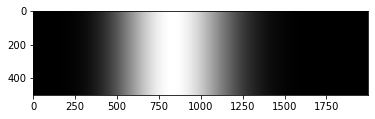

In [30]:
fig,ax = plt.subplots()
img = ax.imshow([x_list for i in range(500)],cmap = "gray")